# Import Libraries 

In [168]:
import datetime

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Read in dataset and drop unecessary tables

In [169]:
#read in
demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality', 'IM_Postneonatal', 'IM_Neonatal'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Recent_Drug_Use'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])

In [170]:
#merge
full = pd.concat([demographics, summary, measure, vunerable,risk], axis=1, join="inner")
full_cpy = full.copy()
selected = full.copy()

In [171]:
selected.info()
selected.describe()

print('\nMissing Values')
print((selected == -1111.1).sum() + (selected == -2222.2).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 18 columns):
State_FIPS_Code     3141 non-null int64
County_FIPS_Code    3141 non-null int64
CHSI_County_Name    3141 non-null object
CHSI_State_Name     3141 non-null object
Health_Status       3141 non-null float64
Unhealthy_Days      3141 non-null float64
Premature           3141 non-null float64
Under_18            3141 non-null float64
Over_40             3141 non-null float64
Infant_Mortality    3141 non-null float64
IM_Neonatal         3141 non-null float64
IM_Postneonatal     3141 non-null float64
Recent_Drug_Use     3141 non-null int64
Toxic_Chem          3141 non-null int64
Obesity             3141 non-null float64
High_Blood_Pres     3141 non-null float64
Smoker              3141 non-null float64
Diabetes            3141 non-null float64
dtypes: float64(12), int64(4), object(2)
memory usage: 441.8+ KB

Missing Values
State_FIPS_Code        0
County_FIPS_Code       0
CHSI_County_Name

# Impute the data and fill empty data with mean values

In [172]:
selected = selected.replace(-1111.1, np.NaN)
selected = selected.replace(-1111, np.NaN)
selected = selected.replace(-1, np.NaN)

selected = selected.replace(-2222.2, np.NaN)
selected = selected.replace(-2222, np.NaN)
selected = selected.replace(-2, np.NaN)

selected = selected.replace(-9999, np.NaN)
selected = selected.dropna(subset=['Infant_Mortality'])

# fill missing values with mean column values
selected.fillna(selected.mean(), inplace=True)
# count the number of NaN values in each column

#full will contain all values 
full = selected.copy()

selected.drop('CHSI_County_Name', axis=1, inplace=True)
selected.drop('CHSI_State_Name', axis=1, inplace=True)
selected.drop('State_FIPS_Code', axis=1, inplace=True)
selected.drop('County_FIPS_Code', axis=1, inplace=True)

# Viewing the data 

,Health_Status,Unhealthy_Days,Premature,Under_18,Over_40,Infant_Mortality,IM_Neonatal,IM_Postneonatal,Recent_Drug_Use,Toxic_Chem,Obesity,High_Blood_Pres,Smoker,Diabetes
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2.872000e+03,2872.000000,2872.000000,2872.000000,2872.000000
mean,17.427476,6.153685,12.005954,4.769986,1.703837,7.410028,4.759951,2.609828,5809.001045,1.859169e+06,24.207395,26.454461,23.368107,7.828522
std,5.580137,1.234869,2.336113,2.278630,0.875316,2.888455,2.167556,1.459041,19526.347862,1.060639e+07,4.242370,3.924277,4.896821,2.616360
min,2.200000,2.200000,5.400000,0.300000,0.200000,0.000000,0.000000,0.000000,81.000000,0.000000e+00,4.200000,7.200000,3.600000,0.500000
25%,13.800000,5.400000,10.300000,3.100000,1.100000,5.500000,3.300000,1.600000,697.000000,3.480275e+04,22.300000,25.900000,21.000000,6.100000
50%,17.427476,6.153685,11.800000,4.400000,1.500000,7.000000,4.500000,2.400000,1502.000000,3.713365e+05,24.207395,26.454461,23.368107,7.828522
75%,19.900000,6.700000,13.300000,6.100000,2.000000,8.900000,5.900000,3.300000,3958.500000,1.859169e+06,26.000000,26.500000,25.600000,9.200000
max,47.700000,12.600000,23.500000,14.400000,9.100000,23.700000,18.800000,14.200000,665392.000000,4.987494e+08,42.600000,47.100000,46.200000,20.800000


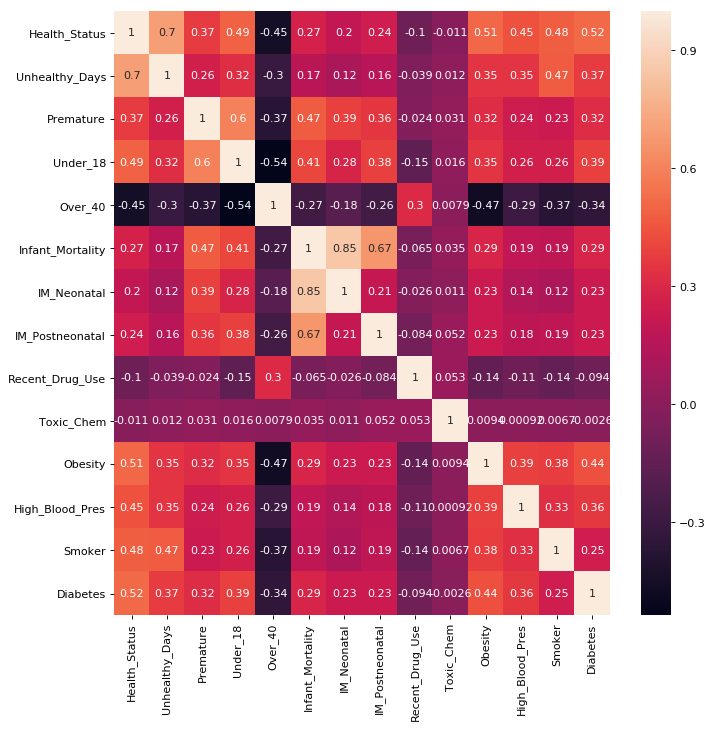

In [173]:
corr = selected.corr()
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='b')
sns.heatmap(corr, annot=True)

selected.head()
selected.describe()

# Split data set to testing and training 

In [174]:
target = pd.DataFrame(full, columns=["Infant_Mortality"])
selected.drop('Infant_Mortality', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(selected, target, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2297, 13)
(2297, 1)
(575, 13)
(575, 1)


In [175]:
from sklearn.ensemble import BaggingRegressor as br

b = br(bootstrap = True, n_jobs =-1, n_estimators = 6)
m = DecisionTreeRegressor()

model = m.fit(X_train, y_train)
modelb = b.fit(X_train, y_train.values.ravel())
predictions = m.predict(X_test)

print(predictions.shape)

(575,)


(0, 25)

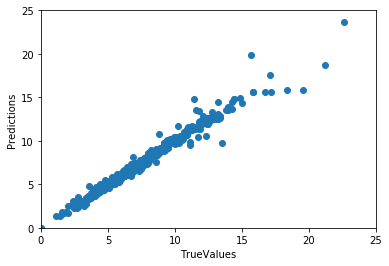

In [176]:
plt.scatter(y_test.values, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.xlim(0, 25)
plt.ylim(0, 25)

In [177]:
print("Score: {}".format(model.score(X_test, y_test)))

print("Feature Importances:")
fImport = dict(zip(selected.columns, m.feature_importances_))
for i in zip( fImport.keys(), fImport.values()):
    print(i)

Score: 0.9739398721139237
Feature Importances:
('Health_Status', 0.0005381222672429493)
('Unhealthy_Days', 0.001203383763932617)
('Premature', 0.0003693916581285262)
('Under_18', 0.0005312292409691303)
('Over_40', 0.00038811637115400557)
('IM_Neonatal', 0.7241204645882217)
('IM_Postneonatal', 0.25969798991086396)
('Recent_Drug_Use', 0.010954225225197848)
('Toxic_Chem', 0.0003903295605387835)
('Obesity', 0.0009067128511093754)
('High_Blood_Pres', 0.00011439693284562001)
('Smoker', 0.0002131826207363817)
('Diabetes', 0.0005724550090595692)


In [178]:
print(X_test.shape)

(575, 13)


# Cross Validation and Feature Results

In [179]:
print(modelb.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(m, selected, target.values.ravel(), cv=4)

print("Decision Reg Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.9808476382087069
Decision Reg Accuracy: 0.97 (+/- 0.03)


In [180]:
print(X_test.shape)

(575, 13)


# Geographical heatmap

In [181]:
from geopy import geocoders
import gmaps

with open('apikey.txt') as f:
    apikey = f.readline()
    f.close
    
gmaps.configure(api_key=apikey)

In [182]:
col = ['State', 'County', 'Latitude', 'Longitude']
places = []

im_places_df = pd.read_csv('./data/places_with_coords.csv')

print(im_places_df)

      Unnamed: 0      State       County  Latitude  Longitude
0              0    Alabama      Autauga  32.46402  -86.45970
1              1    Alabama      Baldwin  30.52297  -87.90333
2              2    Alabama      Barbour  31.89127  -85.14549
3              3    Alabama         Bibb  32.99864  -87.12644
4              4    Alabama       Blount  33.99093  -86.57749
5              5    Alabama      Bullock  32.10055  -85.71570
6              6    Alabama       Butler  31.75243  -86.68029
7              7    Alabama      Calhoun  33.65983  -85.83163
8              8    Alabama     Chambers  32.81874  -85.17939
9              9    Alabama     Cherokee  34.17982  -85.76136
10            10    Alabama      Chilton  32.83874  -86.62943
11            11    Alabama      Choctaw  32.01961  -88.26320
12            12    Alabama       Clarke  31.91349  -87.73584
13            13    Alabama         Clay  33.31067  -85.75441
14            14    Alabama     Cleburne  33.67456  -85.51877
15      

In [183]:
locations = im_places_df[['Latitude', 'Longitude']]

# Get the magnitude from the data
weights = full_cpy['Infant_Mortality']
weights = weights.replace(-1111.1, np.NaN)
weights = weights.replace(-2222.2, np.NaN)
weights = weights.replace(-4444.4, np.NaN)
weights = weights.apply(lambda x: x*3)
weights.fillna(weights.mean(), inplace=True)

# Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

end of document